Copyright (c) 2015 Joosep Pata

THE SOFTWARE AND DOCUMENTATION IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Contact: joosep.pata@cern.ch

## Introduction

This guide is meant to help physicists get up and running with julia, the notebook system and the julia->ROOT interface.

It is geared towards people with a bit of experience in bash, unix commands, C/C++ and Python.

Currently, the instructions in this guide are OSX-centric, meant to install julia on a Macbook.

The following blocks stand for code which you should execute
~~~
$ shell/bash commands
julia> commands in the julia repl
~~~



## Getting the software

The recommended way to install the core **julia** is to download the binaries from http://julialang.org/downloads. The latest version is currently **v0.4.0-rc2**. Take care not to download a *0.3* release, which is missing some features that the ROOT package relies on.

On OSX, the installation is via a simple app which you can download from the link below and place under `/Applications`: https://s3.amazonaws.com/julialang/bin/osx/x64/0.4/julia-0.4.0-rc2-osx10.7+.dmg

The julia terminal can be launched by double clicking the app. Note, however, that this is **not** the recommended way to use julia for work.
Instead, let us make the julia executable accessible from every terminal by adding it to search path.

#### Adding julia to PATH

We want to tell our system where to find julia, so that julia programs could be run from the terminal simply with `julia prog.jl`.
Run the julia application once and type into the prompt:

~~~
julia> JULIA_HOME
/Applications/Julia-0.4.0-rc2.app/Contents/Resources/julia/bin
~~~

You should see the path to the julia executable. Now execute the following

~~~
$ echo "export PATH=/Applications/Julia-0.4.0-rc2.app/Contents/Resources/julia/bin:$PATH" >> ~/.bash_profile
~~~
to add the julia search path to the end of the `~/.bash_profile` file, taking care to change the julia path to what was actually printed for you.

### Running julia

To run standard julia, you just need to open a terminal (Applications->Terminal) and type `julia`. You will then be in the REPL. You can disable the banner and version info by running `julia -q`.
~~~
$ julia
               _
   _       _ _(_)_     |  A fresh approach to technical computing
  (_)     | (_) (_)    |  Documentation: http://docs.julialang.org
   _ _   _| |_  __ _   |  Type "?help" for help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 0.4.0-rc2 (2015-09-18 17:51 UTC)
 _/ |\__'_|_|_|\__'_|  |  Official http://julialang.org/ release
|__/                   |  x86_64-apple-darwin13.4.0


julia> exit()
$ 
~~~

Of course, any julia program, stored in a text file ending with `.jl`, can be run also in standalone mode
~~~
$ cat program.jl 
x = 0.3*pi
println("sin($x) = ", sin(x))
$ julia program.jl
sin(0.9424777960769379) = 0.8090169943749475
$
~~~

### Using the REPL

The REPL, short for Read-Eval-Print Loop, is the standard way to interact with julia while testing out new ideas. It hosts the complete julia language in an interactive prompt. Commands you type in will be interpreted, compiled and executed. You will see the output immediately.

Very briefly, the essentials of the REPL are:
  * Exit the REPL by typing *Ctrl-D* on the keyboard or `exit()` to the julia prompt.
  * *Up* and *Down* arrows navigate between the previous commands.
  * *Tab* auto-completes your command using known julia expressions.
  ~~~
  julia> Comp *press Tab*
Complex            Complex128          Complex32           Complex64           CompositeException
  ~~~
  * *Ctrl-R* enables the search through your previous commands. *Esc* to cancel, *Enter* to use the result.
    ~~~
    *press Ctrl-R, type "asd"*
    (reverse-i-search)`asd': r = TFile("asd.root", "RECREATE")
    *Enter* to execute
    ~~~
  * `ans` is a julia variable which contains the result of the last computation.
    ~~~
    julia> 1+2
    3

    julia> ans
    3
    ~~~
  * The `;` character is **not necessary as a line terminator**. However, it can be used to write multiple commands on one line, e.g.
    ~~~
    julia> x=2/3*pi; sin(x)
    0.8660254037844387
    ~~~
    Also, finalizing a julia command with `;` in an interactive environment such as the REPL or notebook tells julia **not** to print the value from the evaluation of the command. 
  * To enter a multi-line command, press *Shift-Enter* to add a new line and *Enter* to finish the command. For example: 
    ~~~
    julia> x=0;for i=1:100
             x += i^2
           end
    ~~~
  

### Installing packages

In julia, downloading the julia itself gets you only the core language. Additional functionality must be added through packages.
Julia has a built-in git-based package system which does most of the work for you.

Packages will be installed to the following directory by default:
~~~
julia> Pkg.dir()
"/Users/joosep/.julia/v0.4"
~~~

You can list the installed packages and their versions using:
~~~
julia> Pkg.status()
19 required packages:
 - ApproxFun                     0.0.8
 - Blosc                         0.1.4
 - Clang                         0.0.5
 ...
~~~

Note that by default, you won't have any packages installed.

Refresh the package database which is stored on github using
~~~
julia> Pkg.update()
~~~

Now you are ready to install packages.

A list of all julia packages can be found at the official repository in http://pkg.julialang.org/. Make sure to click on `0.4` to select packages compatible with the correct version.

Julia packages are all github repositories and their names end with `.jl` to denote that they belong to the julia ecosystem. A few useful packages for physics are:
  * [PyPlot.jl](https://github.com/stevengj/PyCall.jl) for making plots using the python plotting library [matplotlib](http://matplotlib.org/).
  * [IJulia.jl](https://github.com/stevengj/IJulia.jl) the interactive notebook interface, explained in the section *Installing the notebook: IJulia*.
  * [DataFrames.jl](https://github.com/JuliaStats/DataFrames.jl) for managing tabular data.
  * [StatsBase.jl](https://github.com/JuliaStats/StatsBase.jl) for simple statistical methods, histograms.
  * [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) for manipulating probability distributions.
  * [PyCall.jl](https://github.com/stevengj/PyCall.jl) for calling python code from julia.

  
To install a package which is officially released to the julia repository (all of the above), just call the following, without the `.jl` suffix
~~~
julia> Pkg.add("PyPlot")
~~~
This will get PyPlot and all the dependencies. After a successful installation, you can use PyPlot with:

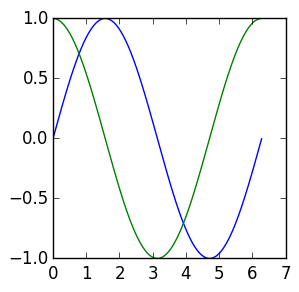

In [25]:
using PyPlot
x = 0:0.01:2*pi
PyPlot.figure(figsize=(3,3))
PyPlot.plot(x, sin(x));
PyPlot.plot(x, cos(x));
PyPlot.savefig("figure.pdf")

PyPlot can be used interactively from the REPL or in batch mode, saving the plots to files. PyPlot also integrates well with the julia notebook, which we will look at next.

### Installing the notebook: IJulia

IJulia offers a notebook-like interface familiar from Mathematica, built on top of the venerable IPython/Jupyter package.

#### Default installation
IJulia can be installed automatically using the Pkg system:
~~~
Pkg.add("IJulia")
~~~
In case your system does not have a recent python version(>=2.7) or the Jupyter package, it will attempt to install them along with IJulia in such a way that they would not affect the rest of the system.

You can test the notebook with
~~~
julia> using IJulia
julia> notebook()
~~~
which should open a browser window. In case that does not work, try the manual installation.

#### Manual installation

If the automatic IJulia installation did not work, you can install a recent version of python manually using Anaconda from http://continuum.io/downloads.

First, clean up the IJulia package using
~~~
Pkg.rm("IJulia")
~~~

Next, download & run the following file to install a new version of python:

  * OSX:
https://3230d63b5fc54e62148e-c95ac804525aac4b6dba79b00b39d1d3.ssl.cf1.rackcdn.com/Anaconda-2.3.0-MacOSX-x86_64.pkg

Choose the **Modify PATH** option in the installer. This will make the new python the default on the system.

Once the installer completes, install Jupyter using
~~~
$ conda install jupyter
~~~

and test that it works with the standard python kernel using
~~~
$ jupyter notebook
~~~

Now follow again the steps in the *Default installation* section above.

### Installing the ROOT bindings

To install the ROOT bindings, first make sure that ROOT v6 is set up and accessible from the terminal. Open a new terminal and run
~~~
$ root-config --version
6.02/05
~~~

If `root-config` is not found, download and install ROOT from
  * OSX: https://root.cern.ch/download/root_v6.05.02.macosx64-10.10-clang61.dmg
  
Afterwards, add ROOT to your `.bash_profile` to initialize it when you start a terminal:

~~~
echo "export PATH=/Applications/root_v6.05.02/bin/thisroot.sh:$PATH" >> ~/.bash_profile
~~~

Now run the julia terminal and install ROOT.jl. This package is currently not in the official repository, you can install it using

~~~
julia> Pkg.clone("https://github.com/jpata/ROOT.jl.git")
julia> Pkg.build("ROOT")
~~~

This will compile a special version of the julia executable that is ROOT-enabled. If the compilation was successful, you should see
~~~
julia> Pkg.build("ROOT")
...
ROOT.jl compiled!
Add the following to your ~/.bashrc or ~/.bash_profile:
alias rjulia="/Users/joosep/.julia/v0.4/ROOT/julia"
~~~
You can add the `alias` command to your `.bash_profile` as a shortcut.

Now you are ready to run julia with ROOT and run a self-test of the package.

~~~
$ /Users/joosep/.julia/v0.4/ROOT/julia
julia> Pkg.test("ROOT")
...
INFO: ROOT tests passed
~~~

**rjulia should be your default julia executable from now on!**


#### Important: Notebook with ROOT
If you want to use the IJulia notebook with ROOT, you must re-compile also the notebook.

~~~
$ /Users/joosep/.julia/v0.4/ROOT/julia
julia> Pkg.build("IJulia")
julia> using IJulia
julia> notebook()
~~~
Now the notebook will be ROOT-enabled.

### Adding additional ROOT helpers.

Some analysis tasks can be simplified by building helper libraries on top of root.

In particular, the handling of histograms and data tables (trees) can be simplified using the following libraries, which are further explained below (WIP).
~~~
julia> Pkg.clone("https://github.com/jpata/ROOTHistograms.jl.git")
julia> Pkg.clone("https://github.com/jpata/ROOTDataFrames.jl.git")
~~~

## Using ROOT

Below are some examples on using ROOT from julia in the notebook.

### Histograms

In [41]:
using ROOT, Distributions
f = TFile("out.root", "RECREATE")
h = TH1D("hist1", "My histogram", 100, -5.0, 5.0)

#Make a symbolic normal distribution with mean 0.2, sigma 0.5
norm = Normal(0.2, 0.5)
for i=1:100000
    Fill(h, rand(norm))
end

#Now we manually get all the bin contents into an array

#make an empty vector
bins = zeros(GetNbinsX(h))

#loop over all histogram bins
for ibin=1:GetNbinsX(h)
    #get the bin data. Note that GetBinContent wants an Int32 as the bin index
    # and indexing in 1-based
    bins[ibin] = GetBinContent(h, Int32(ibin))
end

#lets also save the histogram to a file for inspection
Write(f)
Close(f)

Now we plot the histogram using PyPlot.plot, which draws a set of (x,y) points connected with a line. We could take the x points from the histogram itself, but as we know that they are equidistant, we just make a new linear space for this.

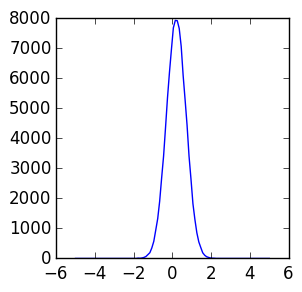

In [48]:
PyPlot.figure(figsize=(3,3))
#specify x manually using linspace, y taken from bin values
xs = linspace(-5.0, 5.0, 100)
PyPlot.plot(xs, bins);

We can also load the histogram from the file.

In [4]:
f = TFile("out.root")

#we have to manually tell ROOT that the object `hist1` is a TH1D
h = root_cast(TH1D, Get(f, "hist1"))

#lets make a helper function to get the bin data
function getbins(h::TH1D)
    bins = zeros(GetNbinsX(h))

    #loop over all histogram bins
    for ibin=1:GetNbinsX(h)
        #get the bin data. Note that GetBinContent wants an Int32 as the bin index
        # and indexing in 1-based
        bins[ibin] = GetBinContent(h, Int32(ibin))
    end
    return bins
end

bins2 = getbins(h);

Now we plot the histogram bins before and after saving it to the ROOT file.

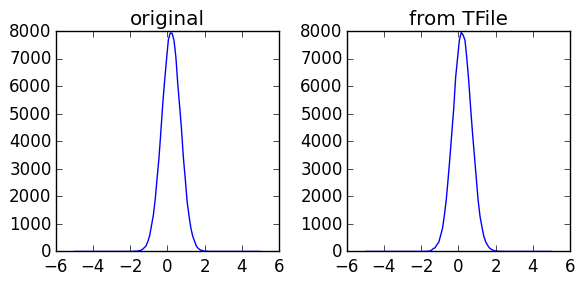

In [49]:
PyPlot.figure(figsize=(6,3))

PyPlot.subplot(1,2,1)
PyPlot.plot(xs, bins)
PyPlot.title("original")

PyPlot.subplot(1,2,2)
PyPlot.plot(xs, bins2);
PyPlot.title("from TFile")

PyPlot.tight_layout()

### Example of unfolding

This is based on the TSVDUnfold documentation: https://root.cern.ch/doc/master/classTSVDUnfold.html#a486a8a201a22408eea5337a2c98f3f1c

First, we define the input distributions:

In [6]:
nbins = 2
xini = TH1D("true", "True distribution", nbins, 0.0, 1.0)
bini = TH1D("reco", "Reco distribution", nbins, 0.0, 1.0)
bdat = TH1D("data", "Measured distribution", nbins, 0.0, 1.0)

covm = TH2D("cov", "Covariance matrix", nbins, 0.0, 1.0, nbins, 0.0, 1.0)

Adet = TH2D("transfer", "Transfer matrix", nbins, 0.0, 1.0, nbins, 0.0, 1.0)

ROOT.TH2D(Ptr{Void} @0x00007fb3fd703520)

Now, we set their contents. We do this very explicitly. In ROOTHistograms.jl, there are methods to create ROOT TH1D/TH2D from arrays.

In [7]:
SetBinContent(xini, 1, 10.0)
SetBinContent(xini, 1, 15.0)

SetBinContent(bini, 1, 2.0)
SetBinContent(bini, 1, 7.0)

SetBinContent(Adet, 1, 1, 0.8)
SetBinContent(Adet, 1, 2, 0.2)
SetBinContent(Adet, 2, 1, 0.15)
SetBinContent(Adet, 2, 2, 0.85)

SetBinContent(covm, 1, 1, 1.0)
SetBinContent(covm, 1, 2, 0.0)
SetBinContent(covm, 2, 1, 0.0)
SetBinContent(covm, 2, 2, 1.0)


SetBinContent(bdat, 1, 2.3)
SetBinContent(bdat, 1, 6.5)

We create the TSVDUnfold object.

In [8]:
svd = TSVDUnfold(
    bdat,
    covm,
    bini,
    xini,
    Adet
)

ROOT.TSVDUnfold(Ptr{Void} @0x00007fb3fd4fa320)

We can run the unfolding and use all the methods defined for TSVDUnfold. Here we also demonstrate the `@show x` macro, which will print the name of the variable along with the value.

**Note**: as the input data is not tuned to be a reasonable unfolding situation, the unfolding algo currently gives some warnings.

In [24]:
hunf = Unfold(svd, 2)
@show(hunf)

unf_covm = GetUnfoldCovMatrix(svd, covm, 100)
@show(unf_covm)

kreg = GetKReg(svd)
@show(kreg)

D = GetD(svd)
@show(D)

SV = GetSV(svd)
@show(SV)

Xtau = GetXtau(svd)
@show(Xtau)

Xinv = GetXinv(svd)
@show(Xinv)

BCov = GetBCov(svd)
@show(BCov)

chi2 = ComputeChiSquared(svd, xini, hunf)
@show(chi2);

Warning in <TFile::Append>: Replacing existing TH1: dd (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: sv (Potential memory leak).
Info in <TSVDUnfold::Unfold>: Unfolding param: 2
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 49.999500


hunf = ROOT.TH1D(Ptr{Void} @0x00007fb3fe24c330)
unf_covm = ROOT.TH2D(Ptr{Void} @0x00007fb3fe24c700)
kreg = 2
D = ROOT.TH1D(Ptr{Void} @0x00007fb3fd74cc80)
SV = ROOT.TH1D(Ptr{Void} @0x00007fb3fd74d050)
Xtau = ROOT.TH2D(Ptr{Void} @0x00007fb3fd74d420)
Xinv = ROOT.TH2D(Ptr{Void} @0x00007fb3fd74da40)
BCov = ROOT.TH2D(Ptr{Void} @0x00007fb3fd4e3d90)
chi2 = 15.744726562072925


## Julia peculiarities

In this section, some of the properties of julia that are sufficiently different from Python or C to be non-obivous will be described.

### 1. String manipulation

To concatenate ("add") two strings of characters, use the `*` operator, **not** `+`:

In [32]:
"CMS Preliminary"*" simulation"

"CMS Preliminary simulation"

Variables can be easily inserted into strings.

In [34]:
s = 13
"$s TeV"

"13 TeV"

Also, more complex code can be interpolated. 

In [35]:
s = sin(2/3*pi)
string("sin(2/3 pi) = $(round(s,2))")

"sin(2/3 pi) = 0.87"

C-style format strings are possible with the special `@sprintf` macro.

In [40]:
s = @sprintf("a=%.2f b=%d s=%s", 0.0123, 3, "xyz");
s

"a=0.01 b=3 s=xyz"

## Troubleshooting

Here we list some of the more common error messages in julia which are not obious to understand when coming from other languages.

#### 1. `convert` has no matching method
This error happens when the constructor arguments for a type are wrong.

In [10]:
type Jet
    pt::Float64
    eta::Float64
end

In [11]:
good = Jet(300.0, 2.3)

Jet(300.0,2.3)

Now, if we use the wrong argument types (string instead of number)

In [12]:
bad = Jet("300.0", 2.5)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Float64}, ::ASCIIString)
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert(::Type{Float64}, !Matched::Int8)
  convert(::Type{Float64}, !Matched::Int16)
  ...
while loading In[12], in expression starting on line 1

We see that the compiler does not know how to convert a string to a float for the first argument. We could do it with

In [13]:
good = Jet(parse(Float64, "300.0"), 2.5)

Jet(300.0,2.5)

Similarly,  you try to create a TH1D with arguments corresponding to a TH2D, you will see

In [14]:
#the last 3 arguments are superfluous
covm = TH1D("cov", "Covariance matrix", nbins, 0.0, 1.0, nbins, 0.0, 1.0)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{ROOT.TH1D}, ::ASCIIString, ::ASCIIString, ::Int64, ::Float64, ::Float64, ::Int64, ::Float64, ::Float64)
This may have arisen from a call to the constructor ROOT.TH1D(...),
since type constructors fall back to convert methods.
Closest candidates are:
  ROOT.TH1D(::ASCIIString, ::ASCIIString, ::Integer, ::Float64, ::Float64)
  ROOT.TH1D(::ASCIIString, ::ASCIIString, ::Integer, !Matched::Ptr{Float32})
  ROOT.TH1D(::ASCIIString, ::ASCIIString, ::Integer, !Matched::Ptr{Float64})
  ...
while loading In[14], in expression starting on line 2

Here the compiler suggest you the correct constructor forms and also points out which arguments were incorrect: **!Matched{X}** means your type for the n-th argument is not compatible with `X`.
The compiler cannot guess that the argument signature corresponds to TH2D instead of TH1D, you must figure this out yourself.

### 2. type redefinition

If you define a type in the interactive environment:

In [15]:
type Lepton
    x::Float64
end

and later find that you want to re-define it with some additional info, you will get an error:

In [16]:
type Lepton
    x::Float64
    y::Float64
end

LoadError: LoadError: invalid redefinition of constant Lepton
while loading In[16], in expression starting on line 1

This is to prevent you from messing with the data structures while they are being used, as then any functions already compiled for `Lepton` would be incorrect with the changed data type.
To reload code at runtime, put it in a `module`.

In [17]:
module MyTypes
type Lepton
    x::Float64
end
end
using MyTypes

Now you can re-define the module and import it again.

In [19]:
module MyTypes
type Lepton
    x::Float64
    y::Float64
end
end
using MyTypes

For more info about redefinitions, see http://julia.readthedocs.org/en/latest/manual/faq/#how-can-i-modify-the-declaration-of-a-type-immutable-in-my-session.